In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Default plotting settings for matplotlib
plt.rc('figure', figsize=(8, 6), dpi=100)

# Datasets

## `hexagon`

In [3]:
hexagon = pd.read_csv('data/hexagon.csv')

In [4]:
hexagon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       600 non-null    float64
 1   y       600 non-null    float64
 2   c       600 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 14.2 KB


In [5]:
hexagon.describe()

,x,y,c
count,600.000000,600.000000,600.00000
mean,0.006708,-0.056915,2.50000
std,2.254771,4.377301,1.70925
min,-4.561541,-8.632626,0.00000
25%,-2.031596,-3.612048,1.00000
50%,-0.017880,-0.815813,2.50000
75%,2.153962,3.580985,4.00000
max,4.727185,8.188139,5.00000


In [6]:
hexagon['c'].value_counts()

1    100
0    100
2    100
4    100
3    100
5    100
Name: c, dtype: int64

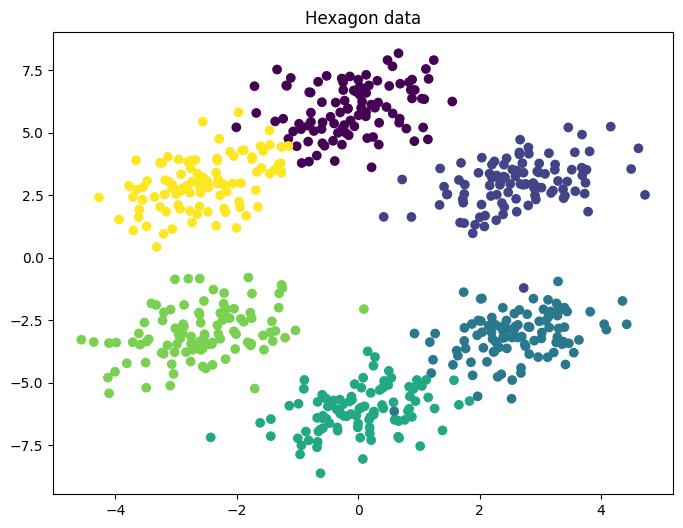

In [7]:
plt.scatter(x='x', y='y', data=hexagon, c='c')
plt.title('Hexagon data')
plt.show()

In [8]:
hex_xy = hexagon[['x', 'y']].to_numpy().reshape((-1, 2))

## `cube`

In [9]:
cube = pd.read_csv('data/cube.csv')

In [10]:
cube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1200 non-null   float64
 1   y       1200 non-null   float64
 2   z       1200 non-null   float64
 3   c       1200 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 37.6 KB


In [11]:
cube.describe()

,x,y,z,c
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,1.482818,2.016366,1.007087,3.500000
std,1.601430,2.128296,1.132364,2.292243
min,-1.986048,-2.262178,-1.619699,0.000000
25%,-0.031297,-0.000977,-0.000701,1.750000
50%,1.414436,1.917702,0.965217,3.500000
75%,2.978607,4.055595,2.010555,5.250000
max,4.996167,6.078151,3.621737,7.000000


In [12]:
cube['c'].value_counts()

0    150
1    150
2    150
3    150
4    150
5    150
6    150
7    150
Name: c, dtype: int64

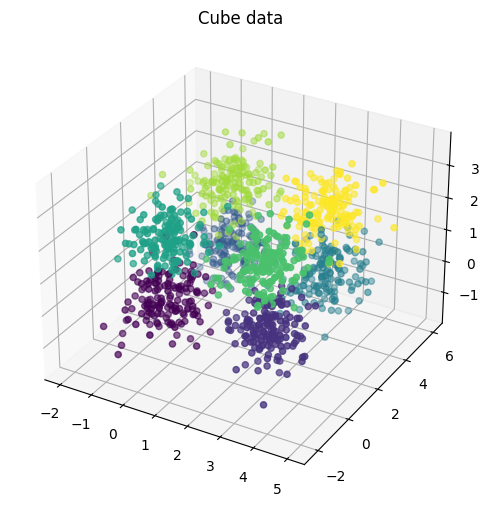

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter('x', 'y', 'z', data=cube, c='c')
plt.title('Cube data')
plt.show()

In [14]:
cube_xyz = cube[['x', 'y', 'z']].to_numpy().reshape((-1, 3))

# Kohonen network testing

In [15]:
from kohonenn.network import KohonenNetwork
from kohonenn.neighbourhood_func import GaussFunction, MexicanHat
from kohonenn.lr_decay_functions import alpha_func

## `hexagon`

### Gaussian neighbourhood function

In [16]:
koh_hex_gauss = KohonenNetwork(
    input_size=2, output_dim=(3, 2),
)

In [17]:
koh_hex_gauss.train(
    data=hex_xy, epochs=100, init_lr=1, lr_decay_func=alpha_func, 
    neighbourhood_func=GaussFunction(nbhood_width_factor=0.1),
    verbosity_period=25, random_state=3,
)

Epoch 25 done!
   - mean abs delta = 0.11888875516979172
   - max abs delta = 2.5035016661553584
Epoch 50 done!
   - mean abs delta = 0.08707959730094227
   - max abs delta = 2.3437592664880293
Epoch 75 done!
   - mean abs delta = 0.06265228324972485
   - max abs delta = 1.714829541908873
Epoch 100 done!
   - mean abs delta = 0.046458890166628034
   - max abs delta = 1.1445837917627568


In [18]:
pred = koh_hex_gauss.predict(hex_xy)

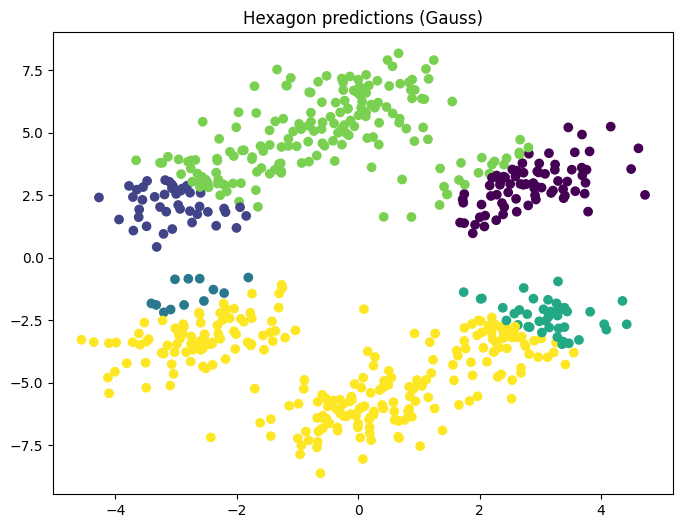

In [19]:
plt.scatter(x='x', y='y', data=hexagon, c=pred)
plt.title('Hexagon predictions (Gauss)')
plt.show()

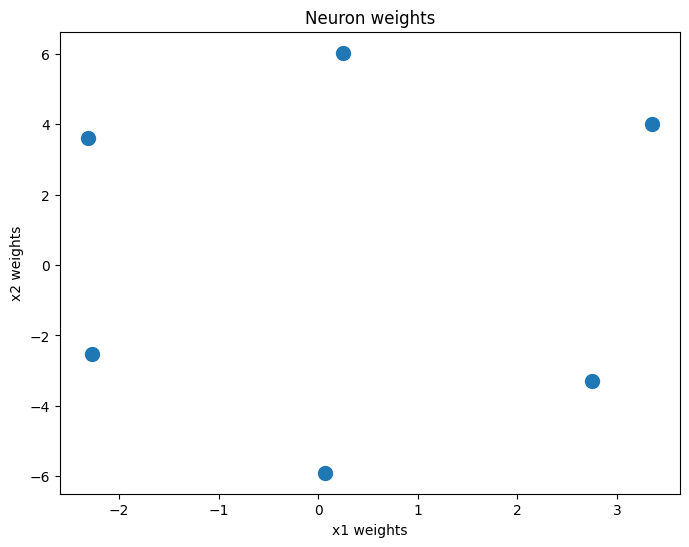

In [20]:
koh_hex_gauss.visualise_weights(size=100)
plt.show()

### Mexican hat neighbourhood function

In [21]:
koh_hex_mex = KohonenNetwork(
    input_size=2, output_dim=(3, 2),
)

In [22]:
koh_hex_mex.train(
    data=hex_xy, epochs=100, init_lr=1, lr_decay_func=alpha_func, 
    neighbourhood_func=MexicanHat(nbhood_width_factor=1),
    verbosity_period=10, random_state=33,
)

Epoch 10 done!
   - mean abs delta = 2.1010148140944975e+161
   - max abs delta = 1.1769118667885824e+162
Epoch 20 done!
   - mean abs delta = 3.929604100729154e+31
   - max abs delta = 2.2012208894978344e+32
Epoch 30 done!
   - mean abs delta = 1.3206998718334615
   - max abs delta = 34.47034838239359
Epoch 40 done!
   - mean abs delta = 1.0592943198017204
   - max abs delta = 26.564668723340514
Epoch 50 done!
   - mean abs delta = 0.9129583902021385
   - max abs delta = 21.64925874242137
Epoch 60 done!
   - mean abs delta = 0.7429561392505457
   - max abs delta = 17.058003400911254
Epoch 70 done!
   - mean abs delta = 0.6559216062837356
   - max abs delta = 14.617652360143413
Epoch 80 done!
   - mean abs delta = 0.5455258472257821
   - max abs delta = 12.680189025037336
Epoch 90 done!
   - mean abs delta = 0.4787417224126448
   - max abs delta = 10.645693240866839
Epoch 100 done!
   - mean abs delta = 0.41114909347362816
   - max abs delta = 10.246786928278


In [23]:
pred = koh_hex_mex.predict(hex_xy)

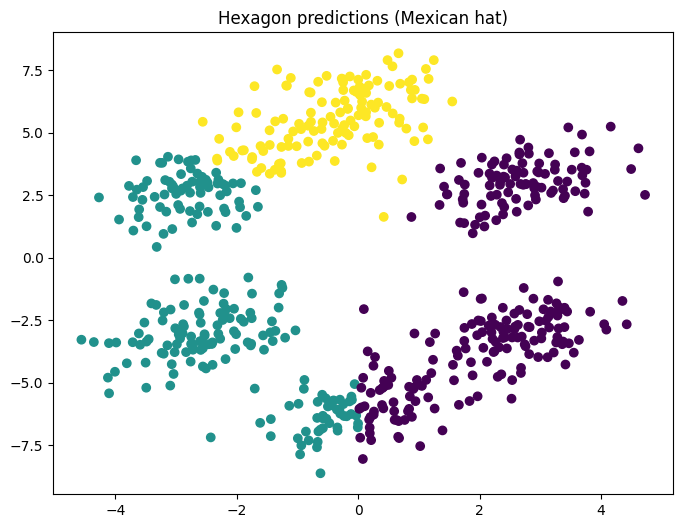

In [24]:
plt.scatter(x='x', y='y', data=hexagon, c=pred)
plt.title('Hexagon predictions (Mexican hat)')
plt.show()

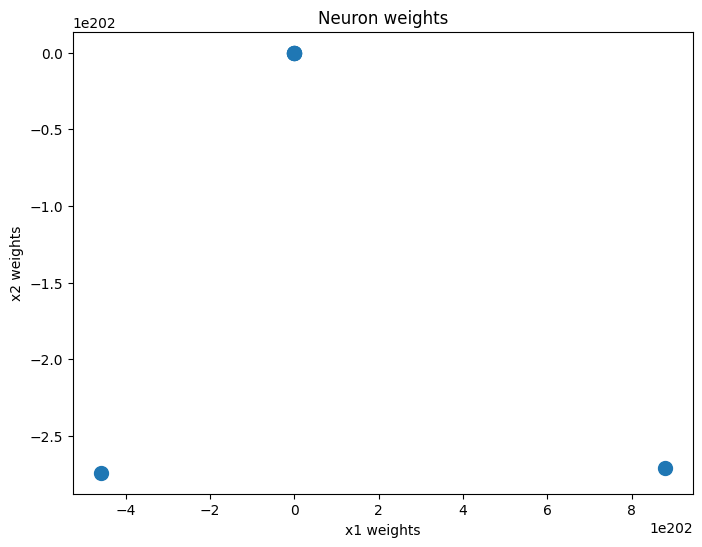

In [25]:
koh_hex_mex.visualise_weights(size=100)
plt.show()

## `cube`

### Gaussian neighbourhood function

In [26]:
koh_cube_gauss = KohonenNetwork(
    input_size=3, output_dim=(4, 2),
)

In [27]:
koh_cube_gauss.train(
    data=cube_xyz, epochs=100, init_lr=1, lr_decay_func=alpha_func, 
    neighbourhood_func=GaussFunction(nbhood_width_factor=0.1),
    verbosity_period=10, random_state=28,
)

Epoch 10 done!
   - mean abs delta = 0.2657489543747126
   - max abs delta = 3.4263253958645388
Epoch 20 done!
   - mean abs delta = 0.06939769581547327
   - max abs delta = 2.3878396430707047
Epoch 30 done!
   - mean abs delta = 0.056047848428755424
   - max abs delta = 2.265541789919998
Epoch 40 done!
   - mean abs delta = 0.04778260482646012
   - max abs delta = 2.2734661577394237
Epoch 50 done!
   - mean abs delta = 0.043555311167543194
   - max abs delta = 1.895869170620434
Epoch 60 done!
   - mean abs delta = 0.03777014423309656
   - max abs delta = 1.3992289387847676
Epoch 70 done!
   - mean abs delta = 0.03330076485720364
   - max abs delta = 1.5233282566269946
Epoch 80 done!
   - mean abs delta = 0.029345421714763082
   - max abs delta = 1.0689042397960533
Epoch 90 done!
   - mean abs delta = 0.026162278332284856
   - max abs delta = 1.029867694733431
Epoch 100 done!
   - mean abs delta = 0.023484216035178754
   - max abs delta = 0.9188233713078723


In [28]:
pred = koh_cube_gauss.predict(cube_xyz)

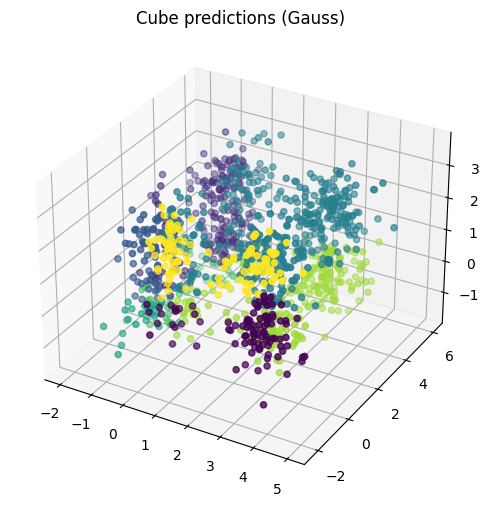

In [29]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter('x', 'y', 'z', data=cube, c=pred)
plt.title('Cube predictions (Gauss)')
plt.show()

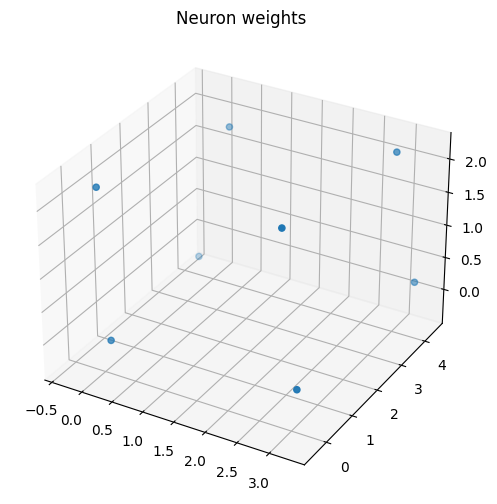

In [30]:
koh_cube_gauss.visualise_weights()
plt.show()

### Mexican hat neighbourhood function

In [31]:
koh_cube_mex = KohonenNetwork(
    input_size=3, output_dim=(4, 2),
)

In [36]:
koh_cube_mex.train(
    data=cube_xyz, epochs=40, init_lr=0.1, lr_decay_func=alpha_func, 
    neighbourhood_func=MexicanHat(nbhood_width_factor=0.01),
    verbosity_period=10, random_state=26,
)

Epoch 10 done!
   - mean abs delta = 0.21064609631567388
   - max abs delta = 0.7376796324809738
Epoch 20 done!
   - mean abs delta = 0.10483839871904377
   - max abs delta = 0.4818223605109651
Epoch 30 done!
   - mean abs delta = 0.07659211307066593
   - max abs delta = 0.5837135435983813
Epoch 40 done!
   - mean abs delta = 1.343997419529001
   - max abs delta = 110.2182370991274


In [37]:
pred = koh_cube_mex.predict(cube_xyz)

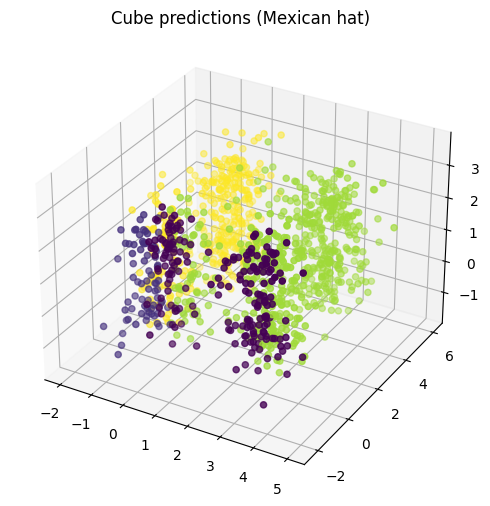

In [38]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter('x', 'y', 'z', data=cube, c=pred)
plt.title('Cube predictions (Mexican hat)')
plt.show()

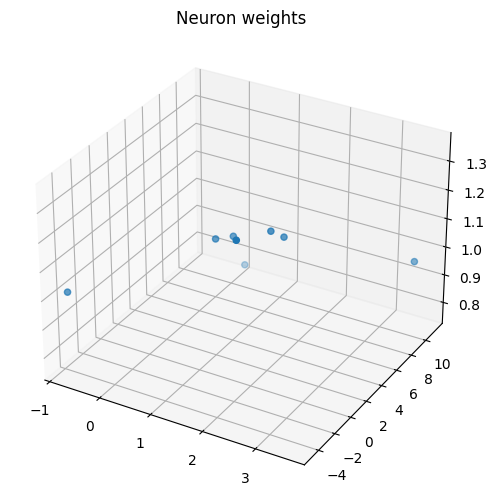

In [39]:
koh_cube_mex.visualise_weights()
plt.show()